In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
df = pd.read_csv('../regression.csv')

In [3]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
X = df.iloc[:,0:4].values
y = df.iloc[:,-1].values

In [5]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [6]:
print(X)

[[0.0 0.0 1.0 165349.2 136897.8 471784.1]
 [1.0 0.0 0.0 162597.7 151377.59 443898.53]
 [0.0 1.0 0.0 153441.51 101145.55 407934.54]
 [0.0 0.0 1.0 144372.41 118671.85 383199.62]
 [0.0 1.0 0.0 142107.34 91391.77 366168.42]
 [0.0 0.0 1.0 131876.9 99814.71 362861.36]
 [1.0 0.0 0.0 134615.46 147198.87 127716.82]
 [0.0 1.0 0.0 130298.13 145530.06 323876.68]
 [0.0 0.0 1.0 120542.52 148718.95 311613.29]
 [1.0 0.0 0.0 123334.88 108679.17 304981.62]
 [0.0 1.0 0.0 101913.08 110594.11 229160.95]
 [1.0 0.0 0.0 100671.96 91790.61 249744.55]
 [0.0 1.0 0.0 93863.75 127320.38 249839.44]
 [1.0 0.0 0.0 91992.39 135495.07 252664.93]
 [0.0 1.0 0.0 119943.24 156547.42 256512.92]
 [0.0 0.0 1.0 114523.61 122616.84 261776.23]
 [1.0 0.0 0.0 78013.11 121597.55 264346.06]
 [0.0 0.0 1.0 94657.16 145077.58 282574.31]
 [0.0 1.0 0.0 91749.16 114175.79 294919.57]
 [0.0 0.0 1.0 86419.7 153514.11 0.0]
 [1.0 0.0 0.0 76253.86 113867.3 298664.47]
 [0.0 0.0 1.0 78389.47 153773.43 299737.29]
 [0.0 1.0 0.0 73994.56 122782.75 3

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [8]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## STOCHASTIC GRADIENT DESCENT

In [9]:
def stochastic_gd(X,y_true,epoch,learning_rate = 0.01):
    no_of_features = X.shape[1]
    w= np.ones(shape= no_of_features)
    b=0
    n=X.shape[0]
    for i in range(epoch):
        random_index = random.randint(0,n-1)
        x_sample= X_train[random_index]
        y_sample= y_train[random_index]
        
        y_pred = np.dot(w,x_sample.T)+b
        w_grad = -(2/n)*(x_sample.T.dot(y_sample-y_pred))
        b_grad = -(2/n)*np.sum(y_sample-y_pred)
        
        w=w-learning_rate*w_grad
        b=b-learning_rate*b_grad
        
        cost = np.mean(np.square(y_true-y_pred))
        
        if i%10==0:
            cost_list.append(cost)
            epoch_list.append(i)
    return w, b, cost_list,epoch_list

In [22]:
cost_list=[]
epoch_list=[]
w, b, cost_list,epoch_list=stochastic_gd(X_train,y_train,10000)
w,b

(array([ -153.94644428,  -785.76901202,   874.40769775, 30537.42108106,
         2944.11988252,  9369.13916318]),
 108729.73206640192)

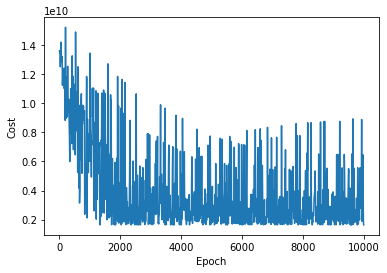

In [23]:
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.plot(epoch_list,cost_list)

In [24]:
def predict(ny,cal,flor,rd,ad,mark):
    new=np.array(sc.transform([[ny,cal,flor,rd,ad,mark]]))
    price_scaled=np.dot(w,new.T)+b
    return price_scaled

In [25]:
print(predict(0,0,1,165349.2,136897.8,471784.1))

[194437.85068488]
